# Relatório de Análise VII

## Identificando e Removendo Outliers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("figure", figsize = (14, 6))

In [2]:
dados = pd.read_csv("Dados/aluguel_residencial.csv", sep = ";")
dados.head(5)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


In [3]:
# Criando uma série

valor = dados["Valor"]

In [4]:
# Calculando os quartis

Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [5]:
# Eliminando os outliers e criando um novo data frame

selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

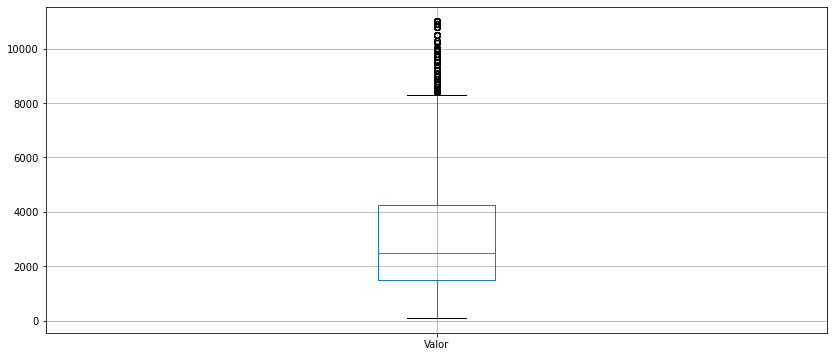

In [6]:
# Plotando o box plot

dados_new.boxplot(["Valor"])

## Identificando e Removendo Outliers (continuação)

In [18]:
# Separando os grupos

grupo_tipo = dados.groupby("Tipo")["Valor"]

In [13]:
# Realizando o cálculos dos quantis por grupo

Q1 = grupo_tipo.quantile(.25).round(2)
Q3 = grupo_tipo.quantile(.75).round(2)
IIQ = (Q3 - Q1).round(2)
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [14]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [23]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [24]:
# Para visualizar o conteúdo da lista devemos:

Q3["Apartamento"]

5000.0

In [26]:
# Realizando a limpeza dos outliers

# Criando um data frame vazio para realiar a concatenação

dados_new = pd.DataFrame()

for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados["Tipo"] == tipo
    eh_dentro_limite = (dados["Valor"] >= limite_inferior[tipo]) & (dados["Valor"] <= limite_superior[tipo])
# Esta validação abaixo somente salva na variável selecao o tipo de imovel que estamos analisando
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
# Realizando a concatenação para adicionar os dados abaixo um do outro
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

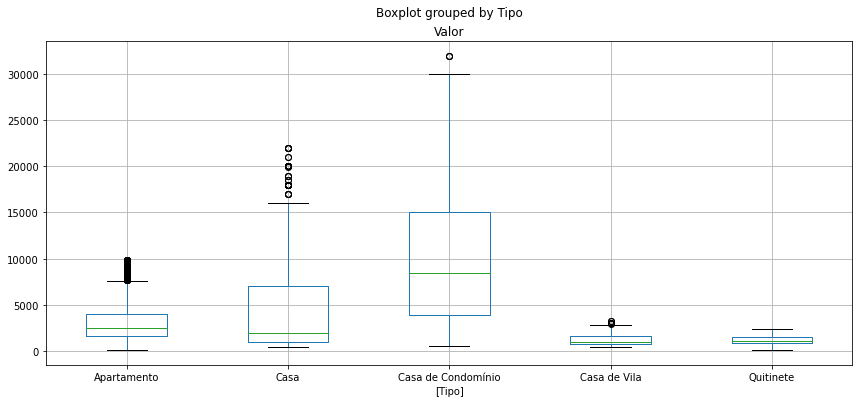

In [27]:
# Plotando o box plot por tipo

dados_new.boxplot(["Valor"], by = ["Tipo"])

In [28]:
# Salvando o novo data frame

dados_new.to_csv("Dados/aluguel_residencial_sem_outliers.csv", sep = ";", index = False)